# SHAP (SHapley Additive exPlanations): Classification model

In [1]:
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import shap

In [2]:
# Prepare dataset.
LOAD_DATA = load_breast_cancer()

df = pd.DataFrame(
    LOAD_DATA.data,
    columns=LOAD_DATA.feature_names
)

In [3]:
df['y'] = LOAD_DATA.target

# Split the data into Explanatory and Objective variables.
X = df[
    df.columns[df.columns != 'y']
]
y = df['y']

In [4]:
# Split dataset into training and test data.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0
)

print(f'X_train length: {len(X_train)}')
display(X_train.head(3))
print(f'\nX_test length: {len(X_test)}')
display(X_test.head(3))

print(f'\nRows: {len(df)}')
print(f'Nunber of y type: {len(y.unique())}')

X_train length: 398


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
478,11.49,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.01969,0.1779,0.06574,...,12.40,21.90,82.04,467.6,0.1352,0.2010,0.25960,0.07431,0.2941,0.09180
303,10.49,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,...,11.06,24.54,70.76,375.4,0.1413,0.1044,0.08423,0.06528,0.2213,0.07842
155,12.25,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,0.1970,0.06228,...,13.59,25.22,86.60,564.2,0.1217,0.1788,0.19430,0.08211,0.3113,0.08132



X_test length: 171


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,16.41,29.66,113.30,844.4,0.1574,0.3856,0.5106,0.20510,0.3585,0.11090
457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.35,34.23,91.29,632.9,0.1289,0.1063,0.1390,0.06005,0.2444,0.06788
439,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,14.91,19.31,96.53,688.9,0.1034,0.1017,0.0626,0.08216,0.2136,0.06710



Rows: 569
Nunber of y type: 2


In [5]:
# Construct Random Forest classification model.
rf_classifier = RandomForestClassifier(
    max_depth=3,
    random_state=0
).fit(
    X_train,
    y_train
)

In [6]:
# Construct SHAP model.
explainer = shap.TreeExplainer(rf_classifier)

shap_values = explainer.shap_values(X_test)

print(len(shap_values))
print(shap_values)

2
[array([[-0.00204042,  0.00885012, -0.01388   , ...,  0.15536879,
         0.01326914,  0.0218135 ],
       [-0.00573586,  0.00549368, -0.01736674, ..., -0.06183954,
        -0.00312969, -0.00273925],
       [-0.00284455, -0.0068685 , -0.01560846, ..., -0.05823875,
        -0.00325783, -0.00273925],
       ...,
       [-0.00631842,  0.00104957, -0.01727813, ..., -0.02886242,
        -0.00069931, -0.00362251],
       [-0.006364  ,  0.00549368, -0.01871594, ..., -0.06327393,
        -0.00258547, -0.00273925],
       [-0.01347132,  0.0053884 , -0.0230231 , ..., -0.0559037 ,
        -0.00350363, -0.00186549]]), array([[ 0.00204042, -0.00885012,  0.01388   , ..., -0.15536879,
        -0.01326914, -0.0218135 ],
       [ 0.00573586, -0.00549368,  0.01736674, ...,  0.06183954,
         0.00312969,  0.00273925],
       [ 0.00284455,  0.0068685 ,  0.01560846, ...,  0.05823875,
         0.00325783,  0.00273925],
       ...,
       [ 0.00631842, -0.00104957,  0.01727813, ...,  0.02886242,
      

- Two SHAP value lists are output because of the binary classification data set.

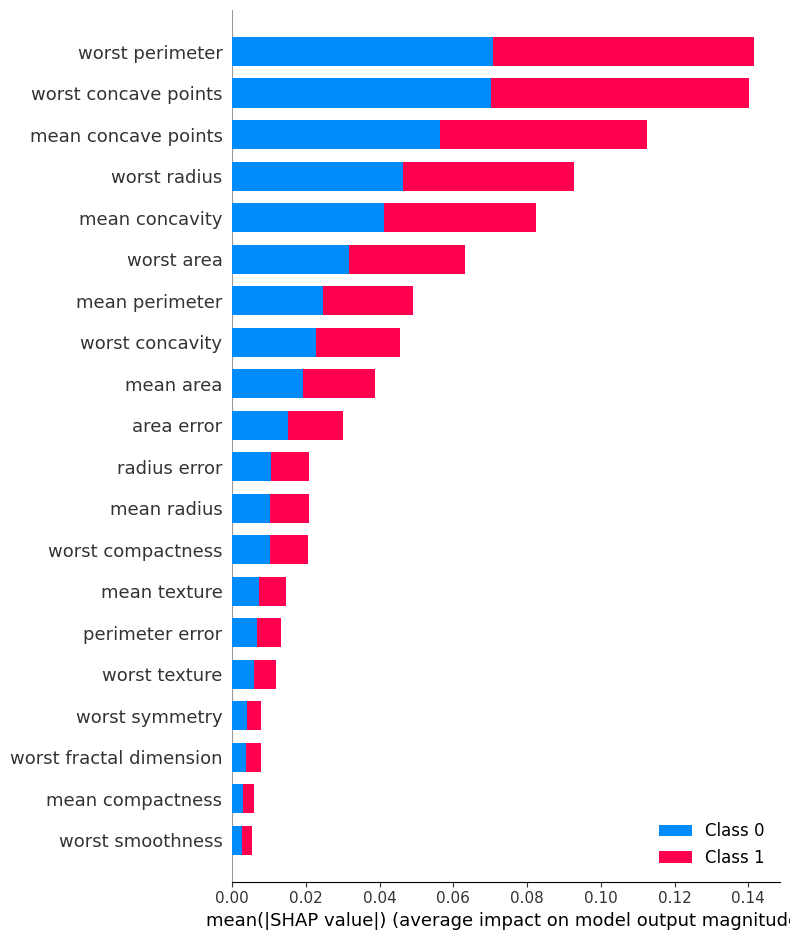

In [7]:
# Interpret classification model using summary_plot.
shap.summary_plot(
    shap_values=shap_values,
    features=X_train,
    plot_type='bar'
)

Class: 0


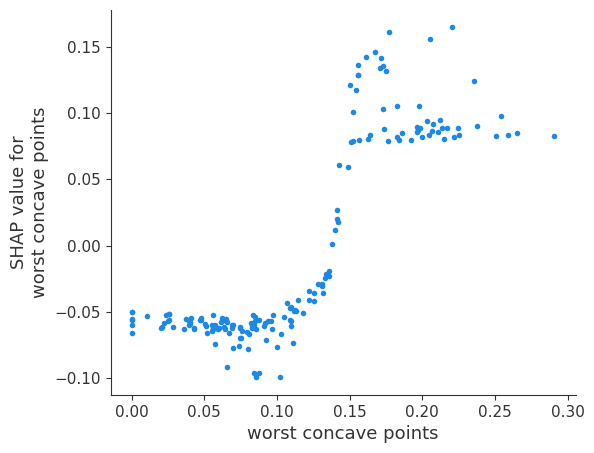

Class: 1


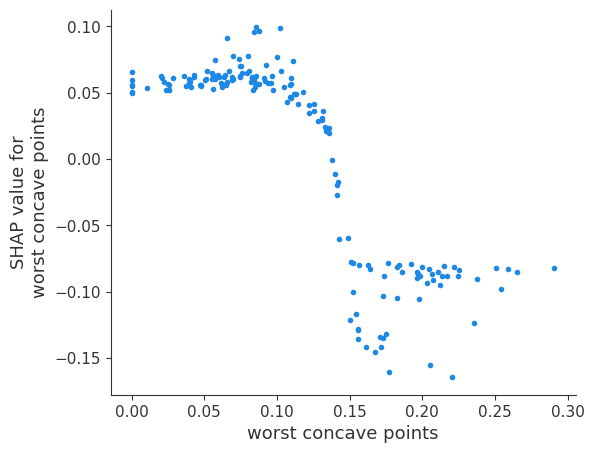

In [8]:
# Interpret regression model using dependence_plot.
for shap_value in range(len(shap_values)):
    print(f'Class: {shap_value}')
    shap.dependence_plot(
        ind='worst concave points',
        interaction_index=None,
        shap_values=shap_values[shap_value],
        features=X_test
    )

In [9]:
# Interpret regression model using force_plot.
shap.initjs()
row_index = 2

for shap_value in range(len(shap_values)):
    print(f'Class: {shap_value}')
    display(
        shap.force_plot(
            explainer.expected_value[shap_value],
            shap_values[shap_value][row_index, :],
            X_test.iloc[row_index, :]
        )
    )

Class: 0


Class: 1
